# Inaugural Project: Exchange Economy

First we start by importing the relevant stuff

In [1]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import matplotlib.pyplot as plt
import Functions as fn
model = fn.ExchangeEconomyClass()
from scipy.optimize import minimize
import scipy.optimize as optimize

# Table of Contents
[Question 1](#Question.1) : Edgeworth box

[Question 2](#Question.2) : Market clearing conditions

[Question 3](#Question.3) : Market clearing price

[Question 4](#Question.4) : 4.a: allocation for specefic p1's & 4.b allocation if any price can be chosen

[Question 5](#Question.5) : 5.a: Allocation for resticted choice 5.b: allocation without restrictions 

[Question 6](#Question.6) : 6.a: Consumption choices by utilitarian social planner

[Question 7&8](#Question.7&8): Random endownment and market equilibrium allocation plottet in Edgeworth box


# Question.1

To illustrate the Edgeworth box, we start by setting up the model and the parameters in Functions.py. The Edgeworth box shows combinations of the two goods that are pareto optimal. 

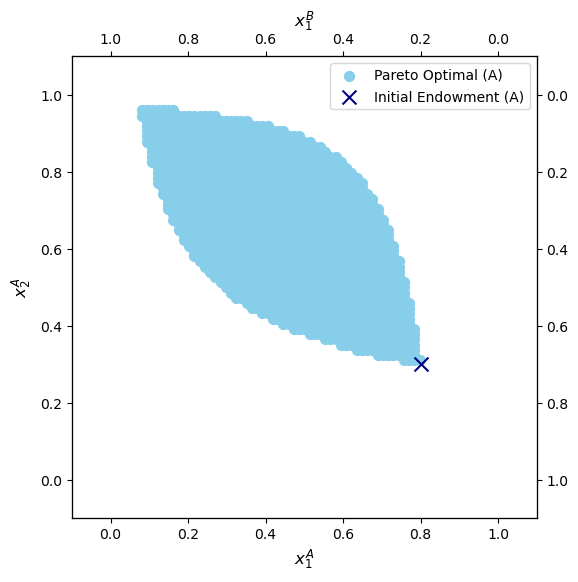

In [2]:

par = model.par
pareto_improvements = model.pareto()
model.edgeworth_box_1()

# Question.2

Now we calculate the error in the market clearing conditions. That is we examine how far the market is from equilibrium for each price p_1 within P1


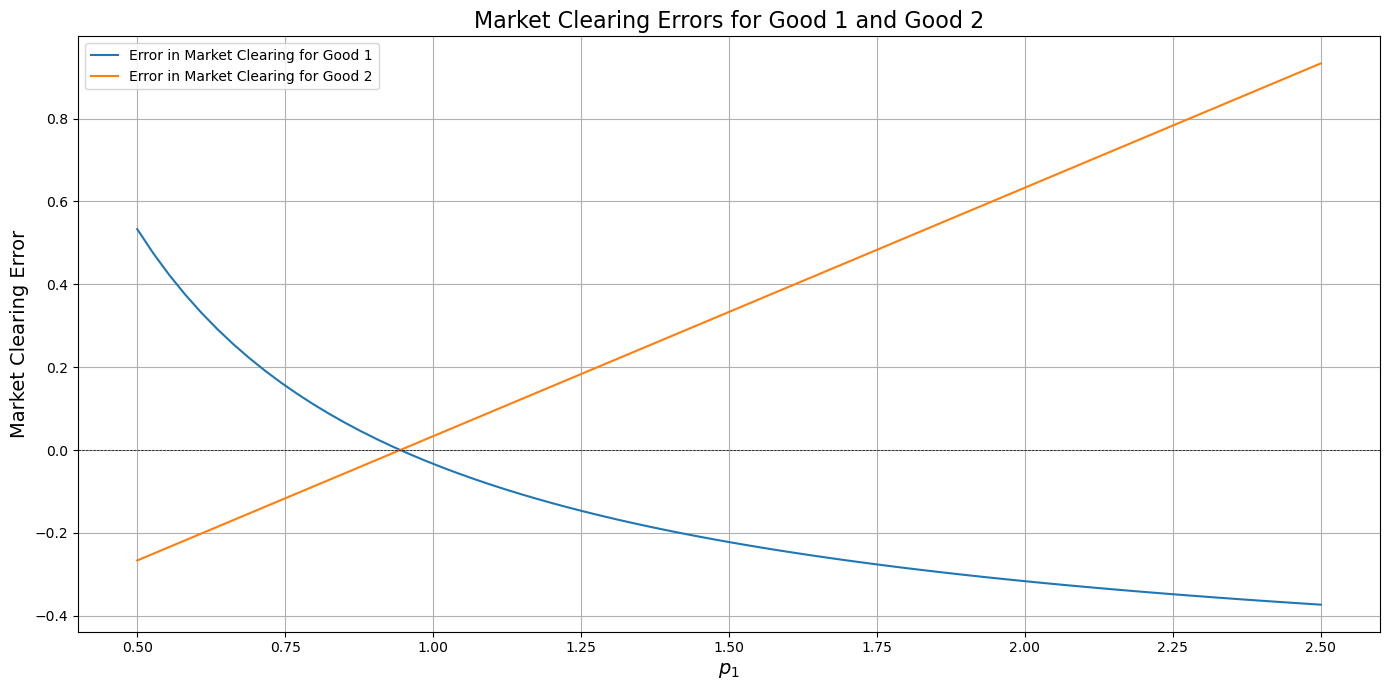

In [3]:

model.market_clearing_conditions_2()

# Question.3

Now we find the market clearing price for p1

In [4]:
p1__ = (par.alpha*par.w2A+par.beta*par.w2B)/(1-par.alpha*par.w1A - par.beta*par.w1B)
print(f'The equilibrium price of good 1 found analytically is : {p1__:.3f}')

#Optimize the price by minimizing the errors of market clearing conditions. 
print(f'The optimal price of good 1 found by minimizing the errors of market clearing conditions is: {model.optimize_price_3()} ')

allocation_3 = model.demand_A(0.971)
model.demand_A(0.94)

The equilibrium price of good 1 found analytically is : 0.944
The optimal price of good 1 found by minimizing the errors of market clearing conditions is: 0.9444428544211817 


(0.37304964539007096, 0.7013333333333335)

# Question.4

Now we assume that A chooses the price to maximize her own utility. 
We find the allocation, first in the scenario where only prices in P1 can be chosen. Secondly the allocation if any positive price can be chosen. 
We assume that A chooses B's consumption, but that B cannot be worse of than in the initial endowment. Thus A is market maker


In [5]:
price_1, utility_1, x1A_allocation, x2A_allocation = model.maximize_utility_A_via_grid_search_4A()

print(f'Consumer A will choose p1 = {price_1:.2f} to maximize her own utility, which is {utility_1:.2f}')
print(f'The allocation is given as: x1A = {x1A_allocation:.2f} and x2A = {x2A_allocation:.2f}')

allocation_4 = x1A_allocation, x2A_allocation


Consumer A will choose p1 = 1.91 to maximize her own utility, which is 0.63
The allocation is given as: x1A = 0.62 and x2A = 0.64


In [6]:
optimal_p1, x1A, x2A, x1B, x2B, utility_A, utility_B = model.maximize_utility_A_unrestricted()
print(f"Optimal p1: {optimal_p1}")
print(f"A's allocation: x1A = {x1A}, x2A = {x2A}")
print(f"B's allocation: x1B = {x1B}, x2B = {x2B}")
print(f"Utility A: {utility_A}, Utility B: {utility_B}")

allocation_4b= model.demand_A(1.8967)

Optimal p1: 1.896780153407069
A's allocation: x1A = 0.6206356936894231, x2A = 0.6402146564395288
B's allocation: x1B = 0.37936430631057694, x2B = 0.35978534356047126
Utility A: 0.633620652587621, Utility B: 0.3727223768098567


# Question.5
Now we find the allocation if choice set is restricted to C. That is the choice set has to be Pareto efficient 

In [7]:
max_utility_A = -np.inf

for allocation in pareto_improvements:
    xA1, xA2 = allocation
    xB1 = 1 - xA1
    xB2 = 1 - xA2
    utility_A = model.utility_A(xA1, xA2)
    utility_B = model.utility_B(xB1, xB2)
    if utility_A > max_utility_A and utility_B > model.utility_B(0.8, 0.3):
        max_utility_A = utility_A
        optimal_allocation_A = allocation

optimal_xA1_5a, optimal_xA2_5a = optimal_allocation_A
print(f"Optimal Allocation for A: xA1 = {optimal_xA1_5a}, xA2 = {optimal_xA2_5a}")
optimal_xB1_5a = 1 - optimal_xA1_5a
optimal_xB2_5a = 1 - optimal_xA2_5a
print(f"Optimal Allocation for B: xB1 = {optimal_xB1_5a}, xB2 = {optimal_xB2_5a}")

# optimal utility for agent A
optimal_utility_A_5a = model.utility_A(optimal_xA1_5a, optimal_xA2_5a)
print(f"Optimal Utility for A: {optimal_utility_A_5a}")



Optimal Allocation for A: xA1 = 0.2972972972972973, xA2 = 0.6081081081081081
Optimal Allocation for B: xB1 = 0.7027027027027026, xB2 = 0.3918918918918919
Optimal Utility for A: 0.47905368262195996


In [8]:
# Initialize variables
max_utility_A = -np.inf
optimal_allocation_A = None

# Loop over all possible allocations for A
for xA1 in np.linspace(0, 1, 100):  # Example granularity
    for xA2 in np.linspace(0, 1, 100):
        if xA1 + xA2 <= 1:  # Ensure allocations are feasible
            xB1 = 1 - xA1
            xB2 = 1 - xA2
            utility_A = model.utility_A(xA1, xA2)
            utility_B = model.utility_B(xB1, xB2)
            if utility_A > max_utility_A and utility_B > model.utility_B(0.8, 0.3):
                max_utility_A = utility_A
                optimal_allocation_A = (xA1, xA2)

# Output the optimal allocations
optimal_xA1_5b, optimal_xA2_5b = optimal_allocation_A
print(f"Optimal Allocation for A: xA1 = {optimal_xA1_5b}, xA2 = {optimal_xA2_5b}")
optimal_xB1_5b = 1 - optimal_xA1_5b
optimal_xB2_5b = 1 - optimal_xA2_5b
print(f"Optimal Allocation for B: xB1 = {optimal_xB1_5b}, xB2 = {optimal_xB2_5b}")

# Calculate the optimal utility for agent A
optimal_utility_A_5b = model.utility_A(optimal_xA1_5b, optimal_xA2_5b)
print(f"Optimal Utility for A: {optimal_utility_A_5b}")

allocation_5 = optimal_xA1_5b, optimal_xA2_5b

Optimal Allocation for A: xA1 = 0.2828282828282829, xA2 = 0.6262626262626263
Optimal Allocation for B: xB1 = 0.7171717171717171, xB2 = 0.3737373737373737
Optimal Utility for A: 0.4804836443109518


# Question.6



In [9]:

initial_guess = [0.5, 0.5]
bounds = [(0, 1), (0, 1)]
opt_result = minimize(model.aggregate_utility, initial_guess, bounds=bounds, method='SLSQP')
optimal_x1A, optimal_x2A = opt_result.x
optimal_x1B, optimal_x2B = 1 - optimal_x1A, 1 - optimal_x2A
print(f'Optimal allocation for A: Good 1: {optimal_x1A}, Good 2: {optimal_x2A}')
print(f'Optimal allocation for B: Good 1: {optimal_x1B}, Good 2: {optimal_x2B}')

allocation_6 = optimal_x1A, optimal_x2A

Optimal allocation for A: Good 1: 0.3334116578920504, Good 2: 0.666588310103883
Optimal allocation for B: Good 1: 0.6665883421079496, Good 2: 0.333411689896117


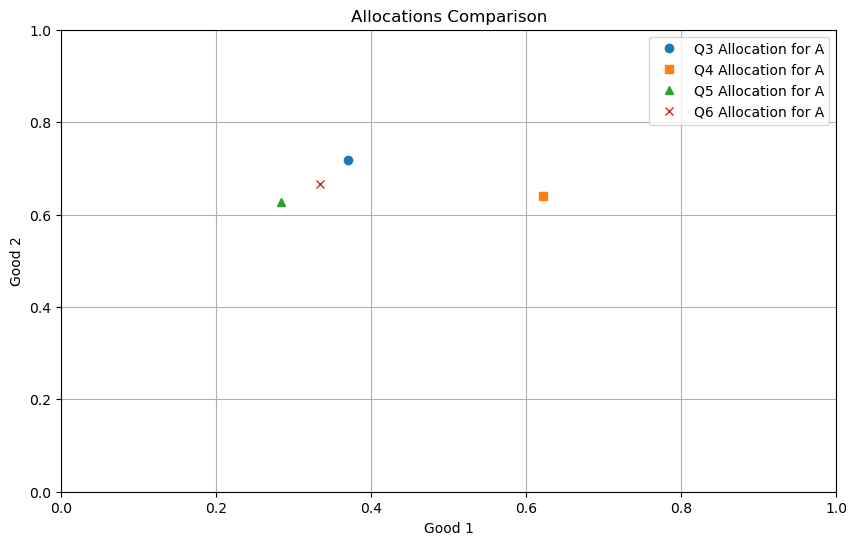

In [10]:

allocation_3 
allocation_4
allocation_5
allocation_6

plt.figure(figsize=(10, 6))


plt.plot(allocation_3[0], allocation_3[1], 'o', label='Q3 Allocation for A')

plt.plot(allocation_4[0], allocation_4[1], 's', label='Q4 Allocation for A')

plt.plot(allocation_5[0], allocation_5[1], '^', label='Q5 Allocation for A')

plt.plot(allocation_6[0], allocation_6[1], 'x', label='Q6 Allocation for A')

plt.xlim(0, 1)  # Set x-axis limits from 0 to 1
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1

plt.xlabel('Good 1')
plt.ylabel('Good 2')
plt.title('Allocations Comparison')
plt.legend()
plt.grid(True)

plt.show()


# Question.7&8



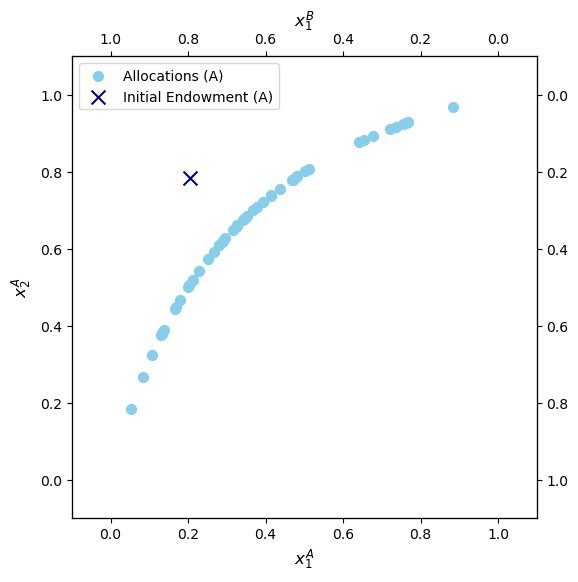

In [11]:
# Generate random endowments
random_endowments = model.generate_random_endowments(num_samples=50)

# Find market equilibrium allocations for each endowment
allocations = []
for w1A, w2A in random_endowments:
    x1A, x2A, x1B, x2B = model.find_market_equilibrium_allocation(w1A, w2A)
    allocations.append((x1A, x2A))

# Plot the allocations in the Edgeworth box
model.plot_edgeworth_box_with_allocations(allocations)